In [74]:
# importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

# About Dataset

This data set contains 13 clinicopathologic features aiming to predict recurrence of well differentiated thyroid cancer. The data set was collected in duration of 15 years and each patient was followed for at least 10 years.

Source

The data was procured from thyroid disease datasets provided by the UCI Machine Learning Repository.

Content

The size for the file featured within this Kaggle dataset is shown below — along with a list of attributes, and their description summaries:

Age: The age of the patient at the time of diagnosis or treatment.

Gender: The gender of the patient (male or female).

Smoking: Whether the patient is a smoker or not.

Hx Smoking: Smoking history of the patient (e.g., whether they have ever smoked).

Hx Radiotherapy: History of radiotherapy treatment for any condition.
Thyroid Function: The status of thyroid function, possibly indicating if there are any abnormalities.

Physical Examination: Findings from a physical examination of the patient, which may include palpation of the thyroid gland and surrounding structures.

Adenopathy: Presence or absence of enlarged lymph nodes (adenopathy) in the neck region.

Pathology: Specific types of thyroid cancer as determined by pathology examination of biopsy samples.

Focality: Whether the cancer is unifocal (limited to one location) or multifocal (present in multiple locations).

Risk: The risk category of the cancer based on various factors, such as tumor size, extent of spread, and histological type.

T: Tumor classification based on its size and extent of invasion into nearby structures.

N: Nodal classification indicating the involvement of lymph nodes.

M: Metastasis classification indicating the presence or absence of distant metastases.

Stage: The overall stage of the cancer, typically determined by combining T, N, and M classifications.

Response: Response to treatment, indicating whether the cancer responded positively, negatively, or remained stable after treatment.

Recurred: Indicates whether the cancer has recurred after initial treatment.

In [75]:
data = pd.read_csv("thyroid.csv")

In [76]:
data.head()

,Age,Gender,Smoking,Hx Smoking,Hx Radiothreapy,Thyroid Function,Physical Examination,Adenopathy,Pathology,Focality,Risk,T,N,M,Stage,Response,Recurred
0,27,F,No,No,No,Euthyroid,Single nodular goiter-left,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Indeterminate,No
1,34,F,No,Yes,No,Euthyroid,Multinodular goiter,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
2,30,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
3,62,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
4,62,F,No,No,No,Euthyroid,Multinodular goiter,No,Micropapillary,Multi-Focal,Low,T1a,N0,M0,I,Excellent,No


# Target Variable = Recurred

In [77]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 383 entries, 0 to 382
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Age                   383 non-null    int64 
 1   Gender                383 non-null    object
 2   Smoking               383 non-null    object
 3   Hx Smoking            383 non-null    object
 4   Hx Radiothreapy       383 non-null    object
 5   Thyroid Function      383 non-null    object
 6   Physical Examination  383 non-null    object
 7   Adenopathy            383 non-null    object
 8   Pathology             383 non-null    object
 9   Focality              383 non-null    object
 10  Risk                  383 non-null    object
 11  T                     383 non-null    object
 12  N                     383 non-null    object
 13  M                     383 non-null    object
 14  Stage                 383 non-null    object
 15  Response              383 non-null    ob

In [78]:
data.isna().sum()

Age                     0
Gender                  0
Smoking                 0
Hx Smoking              0
Hx Radiothreapy         0
Thyroid Function        0
Physical Examination    0
Adenopathy              0
Pathology               0
Focality                0
Risk                    0
T                       0
N                       0
M                       0
Stage                   0
Response                0
Recurred                0
dtype: int64

1.   Here I observed no missing values are present .
2.   And, all the data types are correctlt mentioned.

In [79]:
data.shape

(383, 17)

In [80]:
data['Gender'].unique()

array(['F', 'M'], dtype=object)

Here I used to change Male 'M' to 1
and Female to o

In [81]:
if (data['Gender'] == 'M').any():
    data['Gender'] = 1
else:
    data['Gender'] = 0

In [82]:
data['Gender'].dtype

dtype('int64')

In [83]:
data['Smoking'].unique()

array(['No', 'Yes'], dtype=object)

In [84]:
if (data['Smoking'] == 'Yes').any():
    data['Smoking'] = 1
else:
    data['Smoking'] = 0

In [85]:
data['Hx Smoking'].unique()

array(['No', 'Yes'], dtype=object)

In [86]:
data['Hx Smoking'] = data['Hx Smoking'].replace('Yes',1)
data['Hx Smoking'] = data['Hx Smoking'].replace('No',0)

In [87]:
data['Hx Radiothreapy'].unique()

array(['No', 'Yes'], dtype=object)

In [88]:
data['Hx Radiothreapy'] = data['Hx Radiothreapy'].replace('Yes',1)
data['Hx Radiothreapy'] = data['Hx Radiothreapy'].replace('No',0)

In [89]:
data['Adenopathy'].unique()

array(['No', 'Right', 'Extensive', 'Left', 'Bilateral', 'Posterior'],
      dtype=object)

In [90]:
from sklearn.preprocessing import OneHotEncoder
OHE = OneHotEncoder(sparse=False)
#without sparse we got an error
encoder = OHE.fit_transform(data[['Adenopathy']])

In [91]:
encoder_df = pd.DataFrame(encoder,columns=OHE.get_feature_names_out(['Adenopathy']))

In [92]:
data = pd.concat([data,encoder_df],axis=1)

In [93]:
data.head(2)

,Age,Gender,Smoking,Hx Smoking,Hx Radiothreapy,Thyroid Function,Physical Examination,Adenopathy,Pathology,Focality,...,M,Stage,Response,Recurred,Adenopathy_Bilateral,Adenopathy_Extensive,Adenopathy_Left,Adenopathy_No,Adenopathy_Posterior,Adenopathy_Right
0,27,1,1,0,0,Euthyroid,Single nodular goiter-left,No,Micropapillary,Uni-Focal,...,M0,I,Indeterminate,No,0.0,0.0,0.0,1.0,0.0,0.0
1,34,1,1,1,0,Euthyroid,Multinodular goiter,No,Micropapillary,Uni-Focal,...,M0,I,Excellent,No,0.0,0.0,0.0,1.0,0.0,0.0


In [94]:
data.drop('Adenopathy',axis=1,inplace=True)

In [95]:
data['Response'].unique()

array(['Indeterminate', 'Excellent', 'Structural Incomplete',
       'Biochemical Incomplete'], dtype=object)

In [96]:
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()
data['Response_encoded'] = LE.fit_transform(data['Response'])
data['Response_encoded']

0      2
1      1
2      1
3      1
4      1
      ..
378    0
379    3
380    3
381    3
382    3
Name: Response_encoded, Length: 383, dtype: int32

In [97]:
data['Response_encoded'].unique()

array([2, 1, 3, 0])

Excellent : 1

Intermediate : 2

Sturctural Incomplete : 3

Biochemical Incomplete : 0

In [98]:
data.drop('Response',axis=1,inplace = True)

In [99]:
data['Stage'].unique()

array(['I', 'II', 'IVB', 'III', 'IVA'], dtype=object)

In [100]:
data['Stage_encoded'] = LE.fit_transform(data['Stage'])
data['Stage_encoded']

0      0
1      0
2      0
3      0
4      0
      ..
378    4
379    4
380    4
381    3
382    3
Name: Stage_encoded, Length: 383, dtype: int32

In [101]:
data.drop('Stage',axis=1,inplace = True)

In [102]:
data['T_encoded'] = LE.fit_transform(data['T'])
data['T_encoded']

0      0
1      0
2      0
3      0
4      0
      ..
378    6
379    6
380    6
381    6
382    6
Name: T_encoded, Length: 383, dtype: int32

In [103]:
data.drop('T',axis=1,inplace = True)

In [104]:
data['M'] = data['M'].replace('M0',0)
data['M'] = data['M'].replace('M1',1)

In [105]:
data['N'] = data['N'].replace('N0',0)
data['N'] = data['N'].replace('N1b',1)
data['N'] = data['N'].replace('N1a',2)

In [106]:
data['Risk'].unique()

array(['Low', 'Intermediate', 'High'], dtype=object)

In [107]:
data['Risk'] = data['Risk'].replace('Low',0)
data['Risk'] = data['Risk'].replace('High',2)
data['Risk'] = data['Risk'].replace('Intermediate',1)

In [108]:
data['Focality'].unique()

array(['Uni-Focal', 'Multi-Focal'], dtype=object)

In [109]:
data['Focality'] = data['Focality'].replace('Uni-Focal',0)
data['Focality'] = data['Focality'].replace('Multi-Focal',1)

In [110]:
data['Thyroid Function'].unique()

array(['Euthyroid', 'Clinical Hyperthyroidism', 'Clinical Hypothyroidism',
       'Subclinical Hyperthyroidism', 'Subclinical Hypothyroidism'],
      dtype=object)

In [111]:
encoder = OHE.fit_transform(data[['Thyroid Function']])
encoder_df = pd.DataFrame(encoder,columns=OHE.get_feature_names_out(['Thyroid Function']))
data = pd.concat([data,encoder_df],axis=1)

In [112]:
data.drop('Thyroid Function',axis=1,inplace=True)

In [113]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 383 entries, 0 to 382
Data columns (total 26 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Age                                           383 non-null    int64  
 1   Gender                                        383 non-null    int64  
 2   Smoking                                       383 non-null    int64  
 3   Hx Smoking                                    383 non-null    int64  
 4   Hx Radiothreapy                               383 non-null    int64  
 5   Physical Examination                          383 non-null    object 
 6   Pathology                                     383 non-null    object 
 7   Focality                                      383 non-null    int64  
 8   Risk                                          383 non-null    int64  
 9   N                                             383 non-null    int

In [114]:
encoder = OHE.fit_transform(data[['Physical Examination']])
encoder_df = pd.DataFrame(encoder,columns=OHE.get_feature_names_out(['Physical Examination']))
data = pd.concat([data,encoder_df],axis=1)

In [115]:
data.drop('Physical Examination',axis=1,inplace=True)

In [116]:
data['Pathology'].unique()

array(['Micropapillary', 'Papillary', 'Follicular', 'Hurthel cell'],
      dtype=object)

In [117]:
encoder = OHE.fit_transform(data[['Pathology']])
encoder_df = pd.DataFrame(encoder,columns=OHE.get_feature_names_out(['Pathology']))
data = pd.concat([data,encoder_df],axis=1)

In [118]:
data.drop('Pathology',axis=1,inplace=True)

In [119]:
# We want to encode recurrer also 
data['Recurred'].unique()

array(['No', 'Yes'], dtype=object)

In [120]:
data['Recurred'] = data['Recurred'].replace('No',0)
data['Recurred'] = data['Recurred'].replace('Yes',1)

In [121]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 383 entries, 0 to 382
Data columns (total 33 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   Age                                               383 non-null    int64  
 1   Gender                                            383 non-null    int64  
 2   Smoking                                           383 non-null    int64  
 3   Hx Smoking                                        383 non-null    int64  
 4   Hx Radiothreapy                                   383 non-null    int64  
 5   Focality                                          383 non-null    int64  
 6   Risk                                              383 non-null    int64  
 7   N                                                 383 non-null    int64  
 8   M                                                 383 non-null    int64  
 9   Recurred             

In [122]:
data.describe()

,Age,Gender,Smoking,Hx Smoking,Hx Radiothreapy,Focality,Risk,N,M,Recurred,...,Thyroid Function_Subclinical Hypothyroidism,Physical Examination_Diffuse goiter,Physical Examination_Multinodular goiter,Physical Examination_Normal,Physical Examination_Single nodular goiter-left,Physical Examination_Single nodular goiter-right,Pathology_Follicular,Pathology_Hurthel cell,Pathology_Micropapillary,Pathology_Papillary
count,383.000000,383.0,383.0,383.000000,383.000000,383.000000,383.000000,383.000000,383.000000,383.000000,...,383.000000,383.000000,383.000000,383.000000,383.000000,383.000000,383.000000,383.000000,383.000000,383.000000
mean,40.866841,1.0,1.0,0.073107,0.018277,0.355091,0.433420,0.357702,0.046997,0.281984,...,0.036554,0.018277,0.365535,0.018277,0.232376,0.365535,0.073107,0.052219,0.125326,0.749347
std,15.134494,0.0,0.0,0.260653,0.134126,0.479167,0.643233,0.587823,0.211910,0.450554,...,0.187908,0.134126,0.482210,0.134126,0.422900,0.482210,0.260653,0.222760,0.331522,0.433956
min,15.000000,1.0,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,29.000000,1.0,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000
50%,37.000000,1.0,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,51.000000,1.0,1.0,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
max,82.000000,1.0,1.0,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [123]:
data.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
378    False
379    False
380    False
381    False
382    False
Length: 383, dtype: bool

In [124]:
numerical_features = data.select_dtypes(include=['number']).columns
categorical_features = data.select_dtypes(include=['object']).columns

In [125]:
numerical_features

Index(['Age', 'Gender', 'Smoking', 'Hx Smoking', 'Hx Radiothreapy', 'Focality',
       'Risk', 'N', 'M', 'Recurred', 'Adenopathy_Bilateral',
       'Adenopathy_Extensive', 'Adenopathy_Left', 'Adenopathy_No',
       'Adenopathy_Posterior', 'Adenopathy_Right', 'Response_encoded',
       'Stage_encoded', 'T_encoded',
       'Thyroid Function_Clinical Hyperthyroidism',
       'Thyroid Function_Clinical Hypothyroidism',
       'Thyroid Function_Euthyroid',
       'Thyroid Function_Subclinical Hyperthyroidism',
       'Thyroid Function_Subclinical Hypothyroidism',
       'Physical Examination_Diffuse goiter',
       'Physical Examination_Multinodular goiter',
       'Physical Examination_Normal',
       'Physical Examination_Single nodular goiter-left',
       'Physical Examination_Single nodular goiter-right',
       'Pathology_Follicular', 'Pathology_Hurthel cell',
       'Pathology_Micropapillary', 'Pathology_Papillary'],
      dtype='object')

In [126]:
categorical_features

Index([], dtype='object')

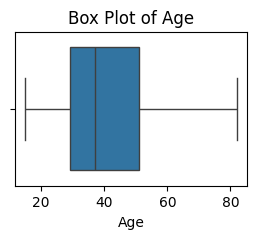

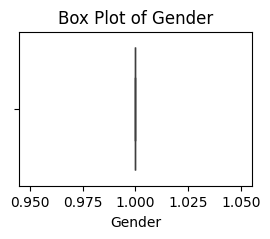

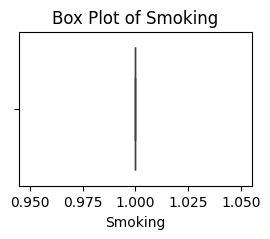

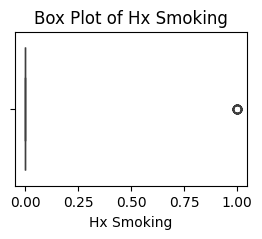

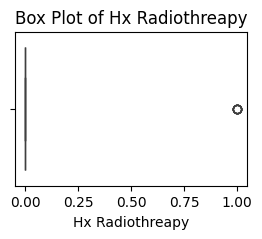

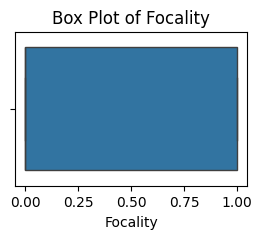

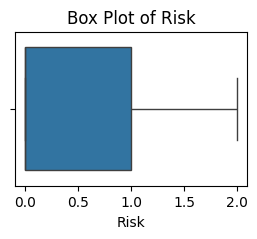

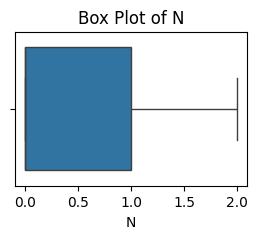

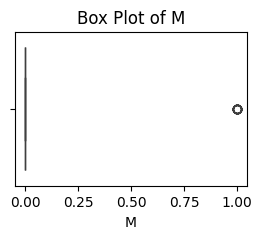

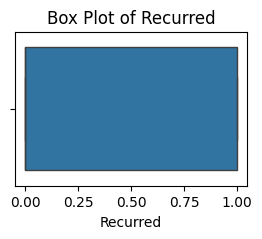

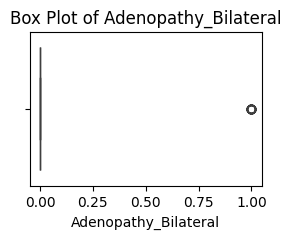

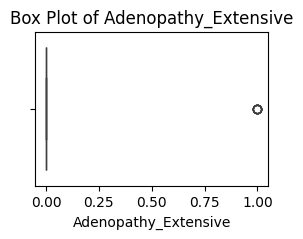

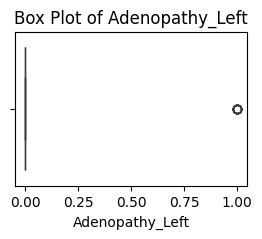

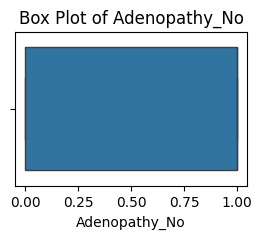

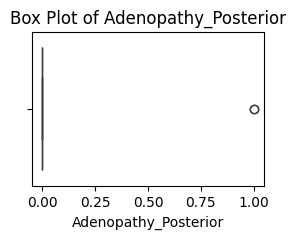

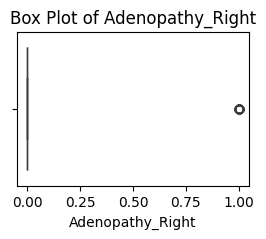

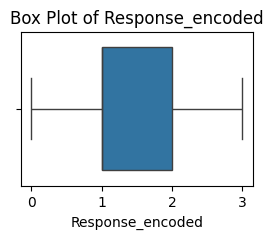

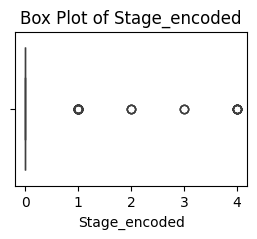

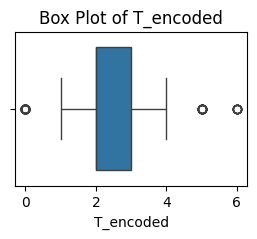

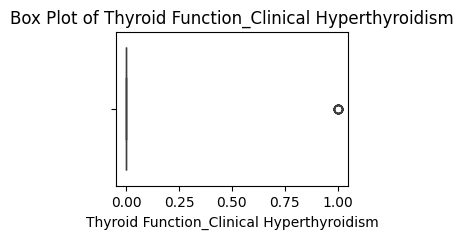

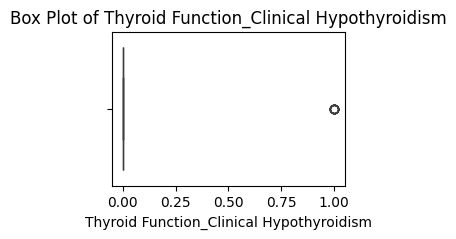

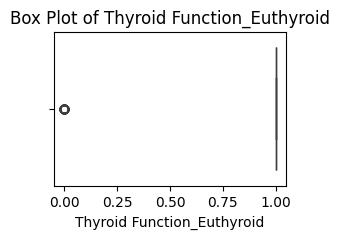

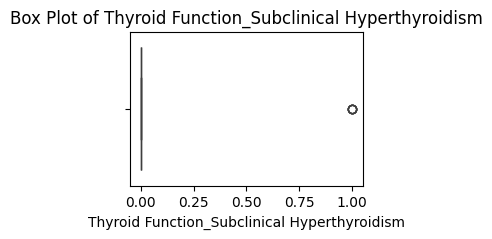

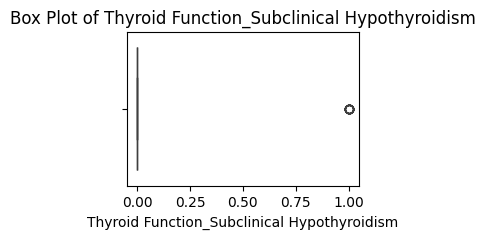

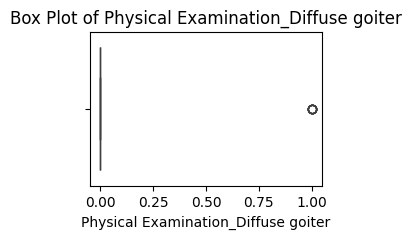

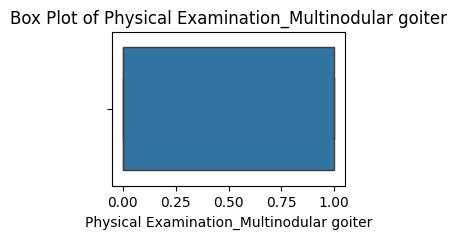

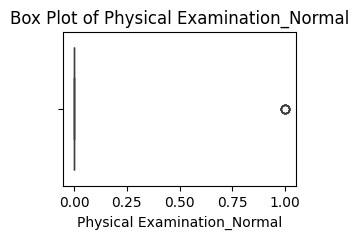

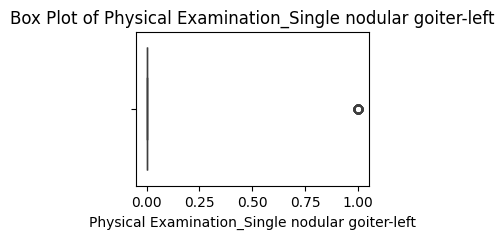

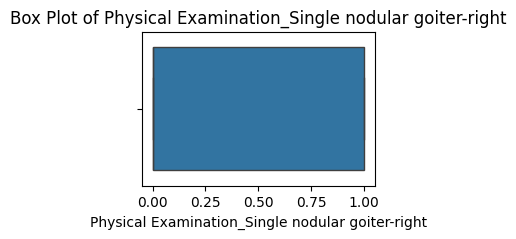

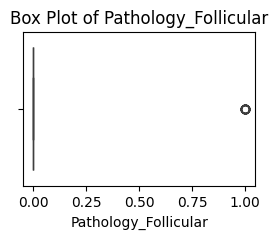

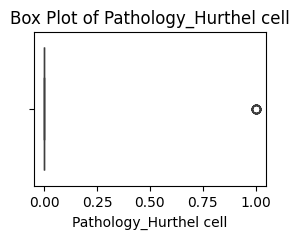

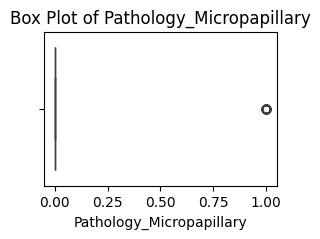

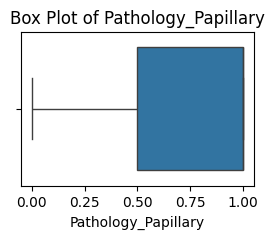

In [127]:
# Box plots for numerical features
for col in numerical_features:
    plt.figure(figsize=(3,2))
    sns.boxplot(x=data[col])
    plt.title(f'Box Plot of {col}')
    plt.show()

# Dividing dataset into train and test 

In [128]:
X_train = data.drop('Recurred',axis=1)
y_train = data['Recurred']

In [129]:
X_train.shape

(383, 32)

In [130]:
y_train.shape

(383,)

1. After hyperparameter tunning i got my data overfitted
2. i.e., % of accuracy decreases from 97 to 95
3. so i need to do FE like ., removing irrelevant features and doing feature selection.

In [131]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [132]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [133]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [134]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [135]:
RF = RandomForestClassifier()
RF.fit(X_train_scaled,y_train)

RandomForestClassifier()

In [136]:
y_pred = RF.predict(X_test_scaled)

In [137]:
print (classification_report(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99        58
           1       1.00      0.95      0.97        19

    accuracy                           0.99        77
   macro avg       0.99      0.97      0.98        77
weighted avg       0.99      0.99      0.99        77

0.987012987012987
[[58  0]
 [ 1 18]]


1. Now, we use polynomial features to increase no.of features in our data.
2. Here we are using polynomial because we have non-linear data (we are using RF)

In [138]:
from sklearn.preprocessing import PolynomialFeatures

# 1. Generate Polynomial Features
poly = PolynomialFeatures(degree=2, interaction_only=False, include_bias=False)
X_train_new = poly.fit_transform(X_train_scaled)
X_test_new = poly.transform(X_test_scaled)

In [140]:
# Convert to DataFrame
poly_feature_names = poly.get_feature_names_out(X_train.columns)
X_train_new_df = pd.DataFrame(X_train_new, columns=poly_feature_names)
X_test_new_df = pd.DataFrame(X_test_new, columns=poly_feature_names)

In [142]:
X_train_new_df.shape

(306, 560)

In [143]:
X_test_new_df.shape

(77, 560)

In [144]:
# Fit the model
RF.fit(X_train_new_df, y_train)

# Get feature importances
importances = RF.feature_importances_
feature_names = X_train_new_df.columns
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)
print(importance_df)

                                               Feature  Importance
415  Response_encoded Physical Examination_Diffuse ...    0.047762
413  Response_encoded Thyroid Function_Subclinical ...    0.040466
218                              Risk Response_encoded    0.040246
407                                 Response_encoded^2    0.036728
421            Response_encoded Pathology_Hurthel cell    0.032835
..                                                 ...         ...
327      Adenopathy_Extensive Pathology_Micropapillary    0.000000
87     Gender Physical Examination_Multinodular goiter    0.000000
86          Gender Physical Examination_Diffuse goiter    0.000000
326        Adenopathy_Extensive Pathology_Hurthel cell    0.000000
108                           Smoking Response_encoded    0.000000

[560 rows x 2 columns]


In [165]:
# Calculate the desired percentile threshold
threshold_percentile = np.percentile(importances, 40)  
# For the 5th percentile i got 0.0 so i need to increase percentile

In [166]:
threshold_percentile

0.0001208309614072486

In [168]:
# Set a threshold for importance score
threshold = 0.00012

# Identify features to remove
#filters and retrieves the names of features with importance scores below the specified threshold.
features_to_remove = importance_df[importance_df['Importance'] < threshold]['Feature']

# Print features to remove
print("Features to remove:", features_to_remove.tolist())

# Remove features from the dataset
X_train_filtered = X_train_new_df.drop(columns=features_to_remove)
X_test_filtered = X_test_new_df.drop(columns=features_to_remove)

Features to remove: ['Pathology_Hurthel cell^2', 'Adenopathy_No Thyroid Function_Clinical Hypothyroidism', 'Adenopathy_Posterior Adenopathy_Right', 'Adenopathy_Posterior Thyroid Function_Clinical Hyperthyroidism', 'Hx Radiothreapy Thyroid Function_Euthyroid', 'Thyroid Function_Clinical Hypothyroidism Pathology_Follicular', 'Hx Radiothreapy Thyroid Function_Clinical Hyperthyroidism', 'Adenopathy_Bilateral Thyroid Function_Clinical Hyperthyroidism', 'Hx Radiothreapy Adenopathy_Bilateral', 'Hx Radiothreapy Focality', 'Adenopathy_No^2', 'Hx Radiothreapy Thyroid Function_Subclinical Hypothyroidism', 'Hx Smoking Pathology_Papillary', 'Focality Physical Examination_Normal', 'Focality', 'Physical Examination_Multinodular goiter Physical Examination_Single nodular goiter-left', 'Stage_encoded Physical Examination_Diffuse goiter', 'M Pathology_Follicular', 'Adenopathy_Extensive Pathology_Papillary', 'Pathology_Follicular^2', 'Physical Examination_Diffuse goiter Physical Examination_Multinodular 

In [169]:
X_train_filtered.shape

(306, 337)

In [170]:
X_test_filtered.shape

(77, 337)

In [171]:
y_train.shape

(306,)

In [181]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

In [182]:
from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(estimator=RF, param_grid=param_grid, cv=5, verbose=2)

In [183]:
grid_search.fit(X_train_filtered,y_train)

Fitting 5 folds for each of 108 candidates, totalling 540 fits
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.3s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.3s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.3s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.3s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.7s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.7s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.7s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.7s
[CV] END m

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [None, 10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             verbose=2)

In [184]:
print("Best Parameters:", grid_search.best_params_) 
print("Best Score:", grid_search.best_score_)

Best Parameters: {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 100}
Best Score: 0.9575356953992598


1. Best Score: 0.9542570068746695
2. now, Best Score: 0.9575356953992598

In [178]:
'''param_grid = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_depth': [None, 10, 20, 30, 40],
    'min_samples_split': [2, 5, 10, 15],
    'min_samples_leaf': [1, 2, 4, 6],
    'max_features': ['auto', 'sqrt', 'log2', 0.5, 0.8],
    'bootstrap': [True, False],
    'criterion': ['gini', 'entropy'],
    'class_weight': [None, 'balanced'],
    'oob_score': [True, False]
}'''

In [179]:
#grid_search = GridSearchCV(estimator=RF, param_grid=param_grid, cv=5, verbose=2,scoring = 'accuracy')
#grid_search.fit(X_train_filtered,y_train)

Fitting 5 folds for each of 32000 candidates, totalling 160000 fits
[CV] END bootstrap=True, class_weight=None, criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100, oob_score=True; total time=   0.4s
[CV] END bootstrap=True, class_weight=None, criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100, oob_score=True; total time=   0.4s
[CV] END bootstrap=True, class_weight=None, criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100, oob_score=True; total time=   0.4s
[CV] END bootstrap=True, class_weight=None, criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100, oob_score=True; total time=   0.4s
[CV] END bootstrap=True, class_weight=None, criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100, oob_score=True; total 

KeyboardInterrupt: 

In [186]:
# Extract the best parameters
best_params = grid_search.best_params_

# Create a new model with the best parameters
rf_new = RandomForestClassifier(**best_params)

# Fit the model on the full training dataset
rf_new.fit(X_train_scaled, y_train)

# Evaluate on the test set
test_accuracy = rf_new.score(X_test_scaled, y_test)
print("Test set accuracy:", test_accuracy)

Test set accuracy: 0.961038961038961


In [187]:
data.head(9)

,Age,Gender,Smoking,Hx Smoking,Hx Radiothreapy,Focality,Risk,N,M,Recurred,...,Thyroid Function_Subclinical Hypothyroidism,Physical Examination_Diffuse goiter,Physical Examination_Multinodular goiter,Physical Examination_Normal,Physical Examination_Single nodular goiter-left,Physical Examination_Single nodular goiter-right,Pathology_Follicular,Pathology_Hurthel cell,Pathology_Micropapillary,Pathology_Papillary
0,27,1,1,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,34,1,1,1,0,0,0,0,0,0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,30,1,1,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,62,1,1,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,62,1,1,0,0,1,0,0,0,0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
5,52,1,1,0,0,1,0,0,0,0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
6,41,1,1,1,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
7,46,1,1,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
8,51,1,1,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [188]:
data.to_csv('cleaned_data.csv', index=False)